In [1]:
import torch
from kan import *

In [2]:
torch.set_default_dtype(torch.float64)  # 为了复现hellokan中的结果，需要用到64位的浮点数精度

In [3]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [4]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

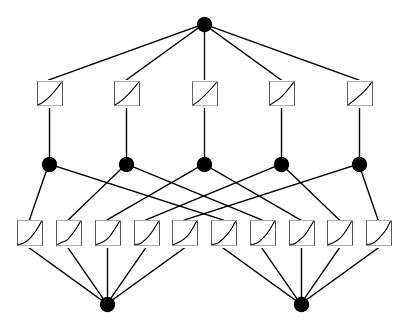

In [5]:
model(dataset['train_input']);
model.plot(beta=100)

In [6]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 1.56e-01 | test loss: 1.31e-01 | reg: 2.06e+01 : 100%|██| 20/20 [00:04<00:00,  4.13it/s]


{'train_loss': [array(0.17743941),
  array(0.17383493),
  array(0.16215534),
  array(0.16275505),
  array(0.15527383),
  array(0.15567184),
  array(0.15646225),
  array(0.15639276),
  array(0.15633533),
  array(0.15627241),
  array(0.1562582),
  array(0.15621976),
  array(0.15620477),
  array(0.15619239),
  array(0.1561888),
  array(0.15618121),
  array(0.15617302),
  array(0.15617123),
  array(0.15616557),
  array(0.15623542)],
 'test_loss': [array(0.1660045),
  array(0.15451127),
  array(0.14846726),
  array(0.14953252),
  array(0.13009414),
  array(0.1305289),
  array(0.13076213),
  array(0.1307541),
  array(0.13078644),
  array(0.13078892),
  array(0.13077167),
  array(0.13078615),
  array(0.13080895),
  array(0.13084494),
  array(0.13085961),
  array(0.13085489),
  array(0.13087947),
  array(0.13087888),
  array(0.13094408),
  array(0.13125866)],
 'reg': [array(43.83509271),
  array(27.654702),
  array(23.32540777),
  array(21.96335506),
  array(21.03053599),
  array(21.5926319),


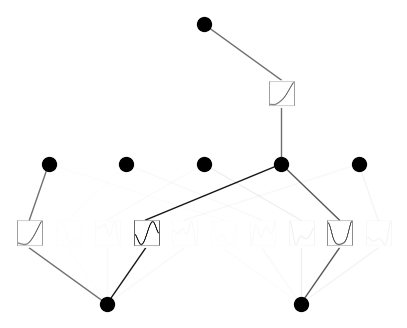

In [7]:
model.plot()

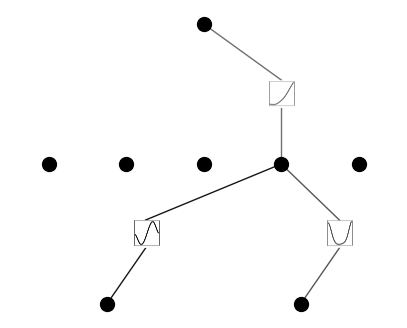

In [8]:
model.prune()
model.plot(mask=True)

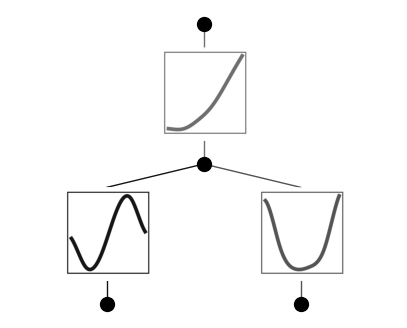

In [9]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [10]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 4.71e-03 | test loss: 4.77e-03 | reg: 3.06e+00 : 100%|██| 50/50 [00:03<00:00, 14.57it/s]


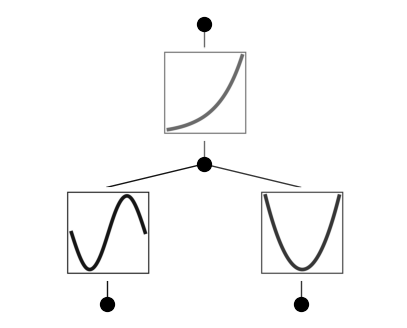

In [11]:
model.plot()

In [12]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999868659118083
fixing (0,1,0) with x^2, r2=0.9999996896105234
fixing (1,0,0) with exp, r2=0.9999990040091712


In [13]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 3.86e-10 | test loss: 3.27e-10 | reg: 3.05e+00 : 100%|██| 50/50 [00:00<00:00, 65.84it/s]


In [14]:
model.symbolic_formula()[0][0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))